# 02-01 Exploratory Data Analysis - Initial Stage

The data is investigated in this notebook:
- Reading the data.
- Printing basic characteristics.
- Plotting the data.
- Evaluating the results.

> **HINT:** *Generally, two basic sections are recommended when working in a Jupyter notebook.*
1. *General Settings. In this section, all* **metaparemeters** *of notebook,* **notebook's constants** *and* **libraries** *should be stated*.
2. *Respective part of the analysis.*

# GENERAL SETTINGS --------------------------------------

## Initial Timestamp

> **HINT:** *It is beneficial to encapsulate the whole code into an initial timestamp and final timestamp (the latter can be found at the end of the notebook) with the following information:*
- *Date and time of starting execution.*
- *Date and time of ending execution.*
- *Notebook calculation duration.*

> **HINT:** *When all work is finished, the notebook should be run from the beginning, and that result should be used as a final result. It is generally good practice to* **run all code before delivery from scratch** *if feasible.*

In [1]:
import time
print("Date and Time of Starting Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))

global_start_time = time.time()

Date and Time of Starting Execution: 01/01/2022 16:34:49


## Libraries

> **HINT:** *It is useful to write down all necessary libraries at the very beginning, especially in final scripts/notebooks.*

In [2]:
#general libraries
import pandas as pd
import configparser

%matplotlib inline

In [3]:
#personal libraries
import Code.Visualization as V

visu = V.Visualizer()

## Notebook Settings

> **HINT:** *General notebook meta parameters should be stated in this section. This is especially useful when repeating analysis several times with different overall settings.*

> **HINT:** *It is also useful to keep some* **code standard** *within the company/team (like PEP8, ...). Let us use capitals for notebook/overall constants here.*

In [4]:
RAW_FILE_NAME = "TShirtsData.csv"

# ANALYSIS ---------------------------------------------------------

## Data Reading

Reading data from a file given by the client. The file path and name are stored in the config file. **The file was not processed before.**

In [5]:
#data reading
raw_data = pd.read_csv(RAW_FILE_NAME)

## Basic Characteristics

First of all, the basic information about the data set are calculated:
* Dimension of data.
* Basic statistics - min, max, ...
* "Bad" values.
* Write down the first seven and last ten rows of the data frame.

In [6]:
#checking data frame type
type(raw_data)

pandas.core.frame.DataFrame

In [7]:
#dimension of data frame
raw_data.shape

(202, 3)

In [8]:
#basic statistics
raw_data.describe()

,NumberOfObservation,Width,Length
count,202.000000,201.000000,202.000000
mean,101.500000,50.919502,683.594554
std,58.456537,10.507498,48.682815
min,1.000000,20.000000,559.600000
25%,51.250000,43.840000,651.100000
50%,101.500000,48.850000,677.800000
75%,151.750000,57.740000,705.700000
max,202.000000,85.360000,1000.000000


In [9]:
# NaN
print(raw_data.isnull().sum())
raw_data[raw_data["Width"].isnull()]

NumberOfObservation    0
Width                  1
Length                 0
dtype: int64


,NumberOfObservation,Width,Length
201,202,NaN,760.0


In [10]:
#first seven rows
raw_data.head(7)

,NumberOfObservation,Width,Length
0,1,45.99,662.5
1,2,43.64,661.5
2,3,56.83,691.2
3,4,53.90,662.7
4,5,35.87,703.8
5,6,48.66,700.3
6,7,59.20,807.9


In [11]:
#last ten rows
raw_data.tail(10)

,NumberOfObservation,Width,Length
192,193,85.36,594.2
193,194,61.77,817.6
194,195,34.65,733.6
195,196,47.79,677.8
196,197,43.31,675.9
197,198,62.48,689.6
198,199,58.62,693.4
199,200,47.78,682.3
200,201,20.00,1000.0
201,202,NaN,760.0


## Visualization

Next, the raw data are plotted in two ways:
1. Axis not equal.
2. Axis equal.

To avoid repeating code, the plotting class was created in the Code folder.

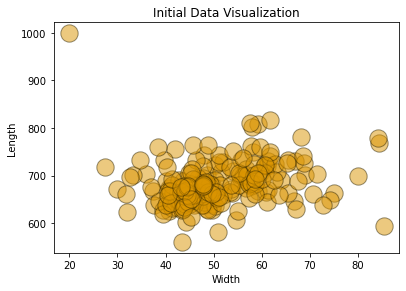

In [12]:
visu.plot_t_shirt_data(raw_data, "Width", "Length", False)

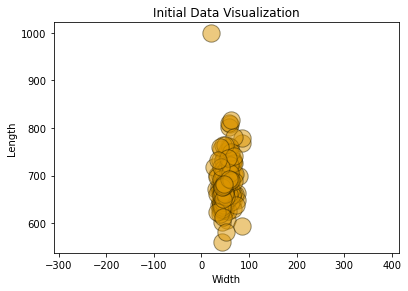

In [13]:
visu.plot_t_shirt_data(raw_data, "Width", "Length", True)

## Interpretation

Finally, the following information was found out:
* The data has an outlier. It is just one observation; it will be deleted.
* The data are badly scaled. In this business case, the dimensions have real meaning - width and length of peoples' optimal t-shirt size. After a phone call with a client, it figured out that the width is in centimetres, but the length is in millimetres. The values have to be rescaled.
* The columns will be renamed to capture the units.
* There is one NaN value in the data set - the whole observation will be deleted.

# Notes

## Back to Question

> **HINT:** *Question is the most important. Please keep it always in mind. At this stage, it is the right moment for repeating it/discussing it / changing it if necessary.*

## Final Timestamp

In [14]:
print("Date and Time of Ending Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))
print("Time duration of whole notebook is: " + str(round((time.time() - global_start_time)/60, 3)) + " seconds")

Date and Time of Ending Execution: 01/01/2022 16:34:52
Time duration of whole notebook is: 0.041 seconds
